# Microsoft Movie Studios

Author: Mario Mocombe

**Overview**

Microsoft is creating a new movie studio and is inquiring about what types of films are currently doing the best at the box office.  The datasets used in answering the business problem are from movie websites and contain box office information. Methods used were exploratory data analysis, data cleaning, and data manipulation.  The data shows that the highest grossing genre of films are Adventure, Action, and Comedy.  The highest grossing time of the year for movie releases is May.  There is also a positive correlation between a film's production budget and its profits.  Ideally, we should make it a priority to hire Christopher Nolan as film director. 

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

Questions to consider:

1. What are the highest grossing genre of movies?
2. What time of the year is best to release a movie?
3. Is there a correlation between budget and profit?
4. Who are fan favorite directors that we should look to hire?

These questions were considered in order to maximize studio success.  Profits are one marker of a film's success, telling us whether or not the film was financially worth pursuing.  Finding out whether a large budget is favorable will aid the studio into making informed decisions.  Data on the highest grossing genres will help Microsoft Studios narrow down on what type of films to invest in.  The release window also influences a film's success.  It's key that the studio releases it at a time where the most people will go see it.  Finally, it's important to choose a proven visionary for the director's chair. 

## Data Understanding
Note that this data may not reflect the most up-to-date box office information.

1) im.db.zip 

    A zipped SQLite database containing movie data from the website Internet Movie Data Base. There is information on genre, online user votes, average user ratings, roles of people involved in the film etc... The most relevant tables are movie_basics (146144 rows × 6 columns), movie_ratings (73856 rows × 3 columns), and persons (606648 rows × 5 columns)
    
2) tn.movie_budgets.csv.gz

    A compressed CSV file containing box office data, release dates, and budget data from the website The Numbers.  Database dimensions are 5782 rows × 6 columns.

In [1]:
##Import Standard Packages
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. What are the highest grossing genres of movies?

## Connect to the IMDB database

In [2]:
# unzip the imdb database file
import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

In [3]:
# make a connection with the IMDB DATABASE using SQLite3
conn = sqlite3.connect('zippedData/im.db')

In [4]:
# set up a cursor in order to browse through the database.
# A cursor object is what can actually execute SQL commands. You create it by calling .cursor() on the connection.

cur = conn.cursor()

# This is a special query for finding the table names. 
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

In [5]:
# Use the fetchall method to find out the table names
# Fetch the result and store it in table_names
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [6]:
# use the pd.read_sql function to generate a dataframe
pd.read_sql("SELECT * FROM movie_basics;", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [7]:
# generate movie ratings table
pd.read_sql("SELECT * FROM movie_ratings ORDER BY movie_id;", conn)

,movie_id,averagerating,numvotes
0,tt0063540,7.0,77
1,tt0066787,7.2,43
2,tt0069049,6.9,4517
3,tt0069204,6.1,13
4,tt0100275,6.5,119
...,...,...,...
73851,tt9913084,6.2,6
73852,tt9914286,8.7,136
73853,tt9914642,8.5,8
73854,tt9914942,6.6,5


In [8]:
# generate persons table
pd.read_sql("SELECT * FROM persons;", conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


## Join Tables

In [9]:
# select relevant columns and join tables using a shared column
# filter out lesser popular titles

d = """
SELECT primary_title, genres, category, primary_name, averagerating, numvotes 
FROM principals
JOIN movie_ratings
USING (movie_id)
JOIN movie_basics
USING (movie_id)
JOIN persons
USING (person_id)
WHERE category = "director"
AND numvotes > 63000
ORDER BY numvotes DESC;
"""
imdb = pd.read_sql(d, conn)

In [10]:
#use exploratory data analysis
imdb.head(20)

,primary_title,genres,category,primary_name,averagerating,numvotes
0,Inception,"Action,Adventure,Sci-Fi",director,Christopher Nolan,8.8,1841066
1,The Dark Knight Rises,"Action,Thriller",director,Christopher Nolan,8.4,1387769
2,Interstellar,"Adventure,Drama,Sci-Fi",director,Christopher Nolan,8.6,1299334
3,Django Unchained,"Drama,Western",director,Quentin Tarantino,8.4,1211405
4,The Avengers,"Action,Adventure,Sci-Fi",director,Joss Whedon,8.1,1183655
5,The Wolf of Wall Street,"Biography,Crime,Drama",director,Martin Scorsese,8.2,1035358
6,Shutter Island,"Mystery,Thriller",director,Martin Scorsese,8.1,1005960
7,Guardians of the Galaxy,"Action,Adventure,Comedy",director,James Gunn,8.1,948394
8,Deadpool,"Action,Adventure,Comedy",director,Tim Miller,8.0,820847
9,The Hunger Games,"Action,Adventure,Sci-Fi",director,Gary Ross,7.2,795227


In [11]:
#set the imdb index to 'primary_title'
imdb.set_index('primary_title', inplace=True)

In [12]:
# .info provides a useful overview of the data
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 985 entries, Inception to The Death of Stalin
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   genres         985 non-null    object 
 1   category       985 non-null    object 
 2   primary_name   985 non-null    object 
 3   averagerating  985 non-null    float64
 4   numvotes       985 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 46.2+ KB


In [13]:
# .describe() calculates the basic summary statistics for each column
imdb.describe()

,averagerating,numvotes
count,985.000000,9.850000e+02
mean,6.810051,2.038916e+05
std,0.860392,1.782048e+05
min,1.600000,6.315600e+04
25%,6.300000,8.962800e+04
50%,6.900000,1.377340e+05
75%,7.400000,2.403370e+05
max,9.300000,1.841066e+06


## The Numbers Database

In [14]:
# Load up the second dataframe, THE NUMBERS, with Pandas.
numbers = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
numbers

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [15]:
# id and domestic gross are irrelevant to our current question and can be dropped:
numbers = numbers.drop(['id', 'domestic_gross'], axis=1)

In [16]:
numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   worldwide_gross    5782 non-null   object
dtypes: object(4)
memory usage: 180.8+ KB


The production_budget and worldwide_gross columns are in the form of a string.  We are going to convert these columns into the float dtype since we are dealing with numbers.

In [17]:
# convert production_budget column into a float. Replace commas and $ signs to avoid errors
numbers['production_budget'] = numbers['production_budget'].apply(lambda x: x.replace(',', '').replace('$','')).astype(float)

In [18]:
# convert worldwide_gross column into a float. Replace commas and $ signs to avoid errors
numbers['worldwide_gross'] = numbers['worldwide_gross'].apply(lambda x: x.replace(',', '').replace('$','')).astype(float)

In [19]:
# set the index to the 'movie' column
numbers.set_index('movie', inplace=True)

In [20]:
# check to see if the changes were made
numbers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, Avatar to My Date With Drew
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5782 non-null   object 
 1   production_budget  5782 non-null   float64
 2   worldwide_gross    5782 non-null   float64
dtypes: float64(2), object(1)
memory usage: 180.7+ KB


## Joining Dataframes

In [21]:
# join the two dataframes using an inner join
joined_df = imdb.join(numbers, how='inner')

joined_df

,genres,category,primary_name,averagerating,numvotes,release_date,production_budget,worldwide_gross
10 Cloverfield Lane,"Drama,Horror,Mystery",director,Dan Trachtenberg,7.2,260383,"Mar 11, 2016",5000000.0,1.082864e+08
12 Years a Slave,"Biography,Drama,History",director,Steve McQueen,8.1,577301,"Oct 18, 2013",20000000.0,1.810253e+08
127 Hours,"Adventure,Biography,Drama",director,Danny Boyle,7.6,323949,"Nov 5, 2010",18000000.0,6.021717e+07
2 Guns,"Action,Comedy,Crime",director,Baltasar Kormákur,6.7,182025,"Aug 2, 2013",61000000.0,1.324930e+08
21 Jump Street,"Action,Comedy,Crime",director,Phil Lord,7.2,477771,"Mar 16, 2012",42000000.0,2.028124e+08
...,...,...,...,...,...,...,...,...
Zero Dark Thirty,"Drama,Thriller",director,Kathryn Bigelow,7.4,251072,"Dec 19, 2012",52500000.0,1.346124e+08
Zootopia,"Adventure,Animation,Comedy",director,Byron Howard,8.0,383446,"Mar 4, 2016",150000000.0,1.019430e+09
Zootopia,"Adventure,Animation,Comedy",director,Rich Moore,8.0,383446,"Mar 4, 2016",150000000.0,1.019430e+09
Zootopia,"Adventure,Animation,Comedy",director,Jared Bush,8.0,383446,"Mar 4, 2016",150000000.0,1.019430e+09


In [22]:
# sort by the number of user votes
joined_df.sort_values(by=['numvotes'], ascending=False).head()

,genres,category,primary_name,averagerating,numvotes,release_date,production_budget,worldwide_gross
Inception,"Action,Adventure,Sci-Fi",director,Christopher Nolan,8.8,1841066,"Jul 16, 2010",160000000.0,8.355246e+08
The Dark Knight Rises,"Action,Thriller",director,Christopher Nolan,8.4,1387769,"Jul 20, 2012",275000000.0,1.084439e+09
Interstellar,"Adventure,Drama,Sci-Fi",director,Christopher Nolan,8.6,1299334,"Nov 5, 2014",165000000.0,6.663794e+08
Django Unchained,"Drama,Western",director,Quentin Tarantino,8.4,1211405,"Dec 25, 2012",100000000.0,4.499483e+08
The Avengers,"Action,Adventure,Sci-Fi",director,Joss Whedon,8.1,1183655,"May 4, 2012",225000000.0,1.517936e+09


In [23]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 855 entries, 10 Cloverfield Lane to xXx: Return of Xander Cage
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genres             855 non-null    object 
 1   category           855 non-null    object 
 2   primary_name       855 non-null    object 
 3   averagerating      855 non-null    float64
 4   numvotes           855 non-null    int64  
 5   release_date       855 non-null    object 
 6   production_budget  855 non-null    float64
 7   worldwide_gross    855 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 60.1+ KB


We will now write a for loop that goes through each films genre and adds up the gross by genre:

In [24]:
labels = ['Action', 'Adventure', 'Sci-Fi', 'Comedy', 'Drama', 'Romance', 'Fantasy', 'Crime', 'Music', 'Thriller', 'Animation', 'History', 'Horror']
height = []

for x in labels:
    genre = joined_df['genres'].str.contains(x)
    gross = joined_df.loc[genre, ['worldwide_gross']].sum()
    height.append(gross)
    
print (labels)
print (height)

['Action', 'Adventure', 'Sci-Fi', 'Comedy', 'Drama', 'Romance', 'Fantasy', 'Crime', 'Music', 'Thriller', 'Animation', 'History', 'Horror']
[worldwide_gross    1.170630e+11
dtype: float64, worldwide_gross    1.417290e+11
dtype: float64, worldwide_gross    5.148419e+10
dtype: float64, worldwide_gross    7.413511e+10
dtype: float64, worldwide_gross    4.520671e+10
dtype: float64, worldwide_gross    9.730366e+09
dtype: float64, worldwide_gross    2.960009e+10
dtype: float64, worldwide_gross    1.690353e+10
dtype: float64, worldwide_gross    4.822237e+09
dtype: float64, worldwide_gross    2.722461e+10
dtype: float64, worldwide_gross    5.263064e+10
dtype: float64, worldwide_gross    2.860497e+09
dtype: float64, worldwide_gross    1.009472e+10
dtype: float64]


Now make a plot of the top-grossing genres:

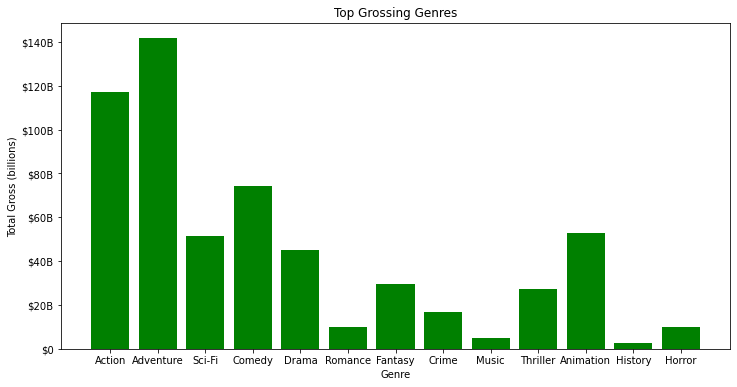

In [25]:
#plot the total gross values by genre
height = [1.170630e+11,1.417290e+11,5.148419e+10, 7.413511e+10, 4.520671e+10, 9.730366e+09,2.960009e+10,1.690353e+10,4.822237e+09,2.722461e+10,5.263064e+10,2.860497e+09,1.009472e+10]       
x = range(13)
labels = ['Action', 'Adventure', 'Sci-Fi', 'Comedy', 'Drama', 'Romance', 'Fantasy', 'Crime', 'Music', 'Thriller', 'Animation', 'History', 'Horror' ]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
plt.ticklabel_format(style='plain')

# Plot vertical bars of fixed width by passing x and height values to .bar() function 
ax.bar(x, height, tick_label=labels, color='green')

# Give a title to the bar graph and label the axes
ax.set_title("Top Grossing Genres")
ax.set_ylabel("Total Gross (billions)")
ax.set_yticks([0,20000000000,40000000000,60000000000,80000000000,100000000000,120000000000, 140000000000])
ax.set_yticklabels(['$0','$20B', '$40B', '$60B', '$80B', '$100B', '$120B', '$140B'])
ax.set_xlabel("Genre");

The top grossing genres are Adventure, Action, and Comedy.  The former two genres do exceptionally well at the box office.    

# 2. What time of the year is best to release a movie? 

In [26]:
# change 'release_date' values into datetime objects
joined_df['release_date'] = pd.to_datetime(joined_df['release_date'])

In [27]:
# make a new 'release month' column by extracting the numeric month from the date
joined_df['release_month'] = joined_df['release_date'].dt.month

In [28]:
joined_df.head(10)

,genres,category,primary_name,averagerating,numvotes,release_date,production_budget,worldwide_gross,release_month
10 Cloverfield Lane,"Drama,Horror,Mystery",director,Dan Trachtenberg,7.2,260383,2016-03-11,5000000.0,108286422.0,3
12 Years a Slave,"Biography,Drama,History",director,Steve McQueen,8.1,577301,2013-10-18,20000000.0,181025343.0,10
127 Hours,"Adventure,Biography,Drama",director,Danny Boyle,7.6,323949,2010-11-05,18000000.0,60217171.0,11
2 Guns,"Action,Comedy,Crime",director,Baltasar Kormákur,6.7,182025,2013-08-02,61000000.0,132493015.0,8
21 Jump Street,"Action,Comedy,Crime",director,Phil Lord,7.2,477771,2012-03-16,42000000.0,202812429.0,3
21 Jump Street,"Action,Comedy,Crime",director,Christopher Miller,7.2,477771,2012-03-16,42000000.0,202812429.0,3
22 Jump Street,"Action,Comedy,Crime",director,Phil Lord,7.0,319504,2014-06-13,50000000.0,331333876.0,6
22 Jump Street,"Action,Comedy,Crime",director,Christopher Miller,7.0,319504,2014-06-13,50000000.0,331333876.0,6
3 Days to Kill,"Action,Drama,Thriller",director,McG,6.2,81681,2014-02-21,28000000.0,38959900.0,2
30 Minutes or Less,"Action,Comedy,Crime",director,Ruben Fleischer,6.1,87254,2011-08-12,28000000.0,40966716.0,8


In [29]:
# filter the releases by month and get the mean worldwide gross for each month
Jan = joined_df.loc[joined_df['release_month'] == 1]

Jan['worldwide_gross'].mean()

118409221.33333333

In [30]:
# repeat for the subsequent months
Feb = joined_df.loc[joined_df['release_month'] == 2]

Feb['worldwide_gross'].mean()

197250054.33870968

In [31]:
Mar = joined_df.loc[joined_df['release_month'] == 3]

Mar['worldwide_gross'].mean()

290692307.1038961

In [32]:
Apr = joined_df.loc[joined_df['release_month'] == 4]

Apr['worldwide_gross'].mean()

261220585.26666668

In [33]:
May = joined_df.loc[joined_df['release_month'] == 5]

May['worldwide_gross'].mean()

434739420.91525424

In [34]:
June = joined_df.loc[joined_df['release_month'] == 6]

June['worldwide_gross'].mean()

383113216.04545456

In [35]:
July = joined_df.loc[joined_df['release_month'] == 7]

July['worldwide_gross'].mean()

300422956.5731707

In [36]:
Aug = joined_df.loc[joined_df['release_month'] == 8]

Aug['worldwide_gross'].mean()

145729015.23076922

In [37]:
Sep = joined_df.loc[joined_df['release_month'] == 9]

Sep['worldwide_gross'].mean()

129864222.6440678

In [38]:
Oct = joined_df.loc[joined_df['release_month'] == 10]

Oct['worldwide_gross'].mean()

146564522.54166666

In [39]:
Nov = joined_df.loc[joined_df['release_month'] == 11]

Nov['worldwide_gross'].mean()

306918660.46464646

In [40]:
Dec = joined_df.loc[joined_df['release_month'] == 12]

Dec['worldwide_gross'].mean()

245785136.30769232

We will now plot our findings:

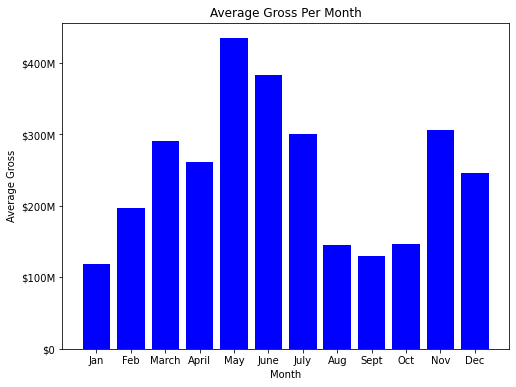

In [41]:
# plot the average box office gross per month
height = [118409221.33333333,197250054.33870968,290692307.1038961,261220585.26666668,434739420.91525424,383113216.04545456,300422956.5731707,145729015.23076922,129864222.6440678,146564522.54166666,306918660.46464646,245785136.30769232]       
x = range(12)
labels = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec' ]

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.ticklabel_format(style='plain')

# Plot vertical bars of fixed width by passing x and height values to .bar() function 
ax.bar(x, height, tick_label=labels, color= 'blue')

# Give a title to the bar graph and label the axes
ax.set_title("Average Gross Per Month")
ax.set_ylabel("Average Gross")
ax.set_yticks([0,100000000,200000000,300000000,400000000])
ax.set_yticklabels(['$0','$100M', '$200M', '$300M', '$400M'])
ax.set_xlabel("Month");

There is a tremendous spike in box office sales during May, June, and July.  A May release is preferable, so that any hit movie has the potential to sustain a box office presence throughout the summer.   

# 3. What is the correlation between budget and profit?

In [42]:
# make a new column, "profit"
joined_df['profit'] = joined_df['worldwide_gross'] - joined_df['production_budget']

In [43]:
# sort values by 'profit'
joined_df.sort_values(by=['profit'], ascending=False).head(20)

,genres,category,primary_name,averagerating,numvotes,release_date,production_budget,worldwide_gross,release_month,profit
Avengers: Infinity War,"Action,Adventure,Sci-Fi",director,Joe Russo,8.5,670926,2018-04-27,300000000.0,2.048134e+09,4,1.748134e+09
Avengers: Infinity War,"Action,Adventure,Sci-Fi",director,Anthony Russo,8.5,670926,2018-04-27,300000000.0,2.048134e+09,4,1.748134e+09
Jurassic World,"Action,Adventure,Sci-Fi",director,Colin Trevorrow,7.0,539338,2015-06-12,215000000.0,1.648855e+09,6,1.433855e+09
Furious 7,"Action,Crime,Thriller",director,James Wan,7.2,335074,2015-04-03,190000000.0,1.518723e+09,4,1.328723e+09
The Avengers,"Action,Adventure,Sci-Fi",director,Joss Whedon,8.1,1183655,2012-05-04,225000000.0,1.517936e+09,5,1.292936e+09
Black Panther,"Action,Adventure,Sci-Fi",director,Ryan Coogler,7.3,516148,2018-02-16,200000000.0,1.348258e+09,2,1.148258e+09
Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",director,J.A. Bayona,6.2,219125,2018-06-22,170000000.0,1.305773e+09,6,1.135773e+09
Frozen,"Adventure,Animation,Comedy",director,Chris Buck,7.5,516998,2013-11-22,150000000.0,1.272470e+09,11,1.122470e+09
Frozen,"Adventure,Animation,Comedy",director,Jennifer Lee,7.5,516998,2013-11-22,150000000.0,1.272470e+09,11,1.122470e+09
Beauty and the Beast,"Family,Fantasy,Musical",director,Bill Condon,7.2,238325,2017-03-17,160000000.0,1.259200e+09,3,1.099200e+09


In [44]:
joined_df.describe()

,averagerating,numvotes,production_budget,worldwide_gross,release_month,profit
count,855.000000,8.550000e+02,8.550000e+02,8.550000e+02,855.000000,8.550000e+02
mean,6.746199,2.128378e+05,6.889730e+07,2.548791e+08,6.832749,1.859818e+08
std,0.839765,1.847582e+05,6.609356e+07,3.011524e+08,3.430317,2.549820e+08
min,1.600000,6.323100e+04,1.750000e+05,0.000000e+00,1.000000,-9.000000e+07
25%,6.300000,9.298000e+04,1.900000e+07,5.938272e+07,4.000000,2.417907e+07
50%,6.800000,1.452810e+05,4.200000e+07,1.396303e+08,7.000000,8.472781e+07
75%,7.300000,2.563705e+05,1.010000e+08,3.250577e+08,10.000000,2.338566e+08
max,8.800000,1.841066e+06,4.106000e+08,2.048134e+09,12.000000,1.748134e+09


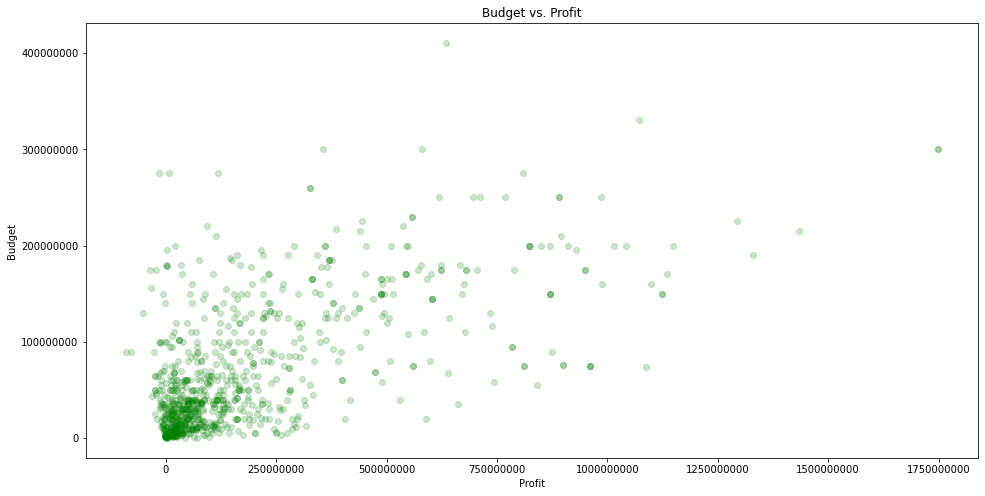

In [45]:
# make scatter plot of budget and profit
fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=joined_df['profit'],
    y=joined_df['production_budget'],
    alpha=0.2,
    color='green')
plt.ticklabel_format(style='plain')
ax.set_xlabel("Profit")
ax.set_ylabel("Budget")
ax.set_title("Budget vs. Profit");

In [46]:
#calculate correlation coefficient
np.corrcoef(joined_df['profit'], joined_df['production_budget'])

array([[1.        , 0.63220364],
       [0.63220364, 1.        ]])

There is a strong correlation between production budget and profit.  This means we are likely to turn a profit with our project and should be liberal with our spending.  The mean production budget is $68,897,300.  We can go well above that with our budget.

# 4. Who are some fan-favorite directors that we should look to hire? 

Now let's take a look at the top 100 voted films in our database.

In [47]:
top100 = joined_df.sort_values(by=['numvotes'],ascending=False).head(100)

In [48]:
top100

,genres,category,primary_name,averagerating,numvotes,release_date,production_budget,worldwide_gross,release_month,profit
Inception,"Action,Adventure,Sci-Fi",director,Christopher Nolan,8.8,1841066,2010-07-16,160000000.0,8.355246e+08,7,6.755246e+08
The Dark Knight Rises,"Action,Thriller",director,Christopher Nolan,8.4,1387769,2012-07-20,275000000.0,1.084439e+09,7,8.094391e+08
Interstellar,"Adventure,Drama,Sci-Fi",director,Christopher Nolan,8.6,1299334,2014-11-05,165000000.0,6.663794e+08,11,5.013794e+08
Django Unchained,"Drama,Western",director,Quentin Tarantino,8.4,1211405,2012-12-25,100000000.0,4.499483e+08,12,3.499483e+08
The Avengers,"Action,Adventure,Sci-Fi",director,Joss Whedon,8.1,1183655,2012-05-04,225000000.0,1.517936e+09,5,1.292936e+09
...,...,...,...,...,...,...,...,...,...,...
The Perks of Being a Wallflower,Drama,director,Stephen Chbosky,8.0,422671,2012-09-21,13000000.0,3.306930e+07,9,2.006930e+07
American Hustle,"Crime,Drama",director,David O. Russell,7.2,418221,2013-12-13,40000000.0,2.578783e+08,12,2.178783e+08
Nightcrawler,"Crime,Drama,Thriller",director,Dan Gilroy,7.9,404476,2014-10-31,8500000.0,5.033442e+07,10,4.183442e+07
Warrior,"Drama,Sport",director,Gavin O'Connor,8.2,403755,2011-09-09,25000000.0,2.421538e+07,9,-7.846150e+05


Now let's look at the representation of directors in the top 100

In [49]:
top100['primary_name'].value_counts().head(20)

Christopher Nolan        4
Peter Jackson            3
Anthony Russo            3
Joe Russo                3
Matthew Vaughn           3
Joss Whedon              3
Quentin Tarantino        2
Baz Luhrmann             2
Martin Scorsese          2
Denis Villeneuve         2
Ridley Scott             2
David Fincher            2
Damien Chazelle          2
David O. Russell         2
Zack Snyder              2
Alejandro G. Iñárritu    2
James Gunn               1
Chris Buck               1
George Miller            1
Todd Phillips            1
Name: primary_name, dtype: int64

Let's compare a few popular directors:

In [50]:
# filter rows for only Christopher Nolan films
CN = top100.loc[top100['primary_name'] == 'Christopher Nolan']
CN

,genres,category,primary_name,averagerating,numvotes,release_date,production_budget,worldwide_gross,release_month,profit
Inception,"Action,Adventure,Sci-Fi",director,Christopher Nolan,8.8,1841066,2010-07-16,160000000.0,8.355246e+08,7,675524642.0
The Dark Knight Rises,"Action,Thriller",director,Christopher Nolan,8.4,1387769,2012-07-20,275000000.0,1.084439e+09,7,809439099.0
Interstellar,"Adventure,Drama,Sci-Fi",director,Christopher Nolan,8.6,1299334,2014-11-05,165000000.0,6.663794e+08,11,501379375.0
Dunkirk,"Action,Drama,History",director,Christopher Nolan,7.9,466580,2017-07-21,150000000.0,4.998374e+08,7,349837368.0


In [51]:
CN.describe()

# AVERAGE Rating 8.425

,averagerating,numvotes,production_budget,worldwide_gross,release_month,profit
count,4.000000,4.000000e+00,4.000000e+00,4.000000e+00,4.0,4.000000e+00
mean,8.425000,1.248687e+06,1.875000e+08,7.715451e+08,8.0,5.840451e+08
std,0.386221,5.728622e+05,5.866572e+07,2.495870e+08,2.0,2.007136e+08
min,7.900000,4.665800e+05,1.500000e+08,4.998374e+08,7.0,3.498374e+08
25%,8.275000,1.091146e+06,1.575000e+08,6.247439e+08,7.0,4.634939e+08
50%,8.500000,1.343552e+06,1.625000e+08,7.509520e+08,7.0,5.884520e+08
75%,8.650000,1.501093e+06,1.925000e+08,8.977533e+08,8.0,7.090033e+08
max,8.800000,1.841066e+06,2.750000e+08,1.084439e+09,11.0,8.094391e+08


In [52]:
CN['numvotes'].sum()
# NUMVOTES 4994749
# AVG TOTAL GROSS $771,545,100

4994749

In [53]:
# filter rows for only Russo Brothers films
RU = top100.loc[top100['primary_name'] == 'Anthony Russo']
RU

,genres,category,primary_name,averagerating,numvotes,release_date,production_budget,worldwide_gross,release_month,profit
Avengers: Infinity War,"Action,Adventure,Sci-Fi",director,Anthony Russo,8.5,670926,2018-04-27,300000000.0,2.048134e+09,4,1.748134e+09
Captain America: The Winter Soldier,"Action,Adventure,Sci-Fi",director,Anthony Russo,7.8,666252,2014-04-04,170000000.0,7.144019e+08,4,5.444019e+08
Captain America: Civil War,"Action,Adventure,Sci-Fi",director,Anthony Russo,7.8,583507,2016-05-06,250000000.0,1.140069e+09,5,8.900694e+08


In [54]:
RU['numvotes'].sum()

1920685

In [55]:
RU.describe()
# AVERAGE Rating 8.03
# NUMVOTES 1920685
# AVG TOTAL GROSS $1,300,869,000

,averagerating,numvotes,production_budget,worldwide_gross,release_month,profit
count,3.000000,3.000000,3.000000e+00,3.000000e+00,3.000000,3.000000e+00
mean,8.033333,640228.333333,2.400000e+08,1.300869e+09,4.333333,1.060869e+09
std,0.404145,49177.675935,6.557439e+07,6.812509e+08,0.577350,6.197759e+08
min,7.800000,583507.000000,1.700000e+08,7.144019e+08,4.000000,5.444019e+08
25%,7.800000,624879.500000,2.100000e+08,9.272357e+08,4.000000,7.172357e+08
50%,7.800000,666252.000000,2.500000e+08,1.140069e+09,4.000000,8.900694e+08
75%,8.150000,668589.000000,2.750000e+08,1.594102e+09,4.500000,1.319102e+09
max,8.500000,670926.000000,3.000000e+08,2.048134e+09,5.000000,1.748134e+09


In [56]:
# filter rows for only Peter Jackson films
PJ = top100.loc[top100['primary_name'] == 'Peter Jackson']
PJ

,genres,category,primary_name,averagerating,numvotes,release_date,production_budget,worldwide_gross,release_month,profit
The Hobbit: An Unexpected Journey,"Adventure,Family,Fantasy",director,Peter Jackson,7.9,719629,2012-12-14,250000000.0,1.017004e+09,12,767003568.0
The Hobbit: The Desolation of Smaug,"Adventure,Fantasy",director,Peter Jackson,7.8,565563,2013-12-13,250000000.0,9.603669e+08,12,710366855.0
The Hobbit: The Battle of the Five Armies,"Adventure,Fantasy",director,Peter Jackson,7.4,438621,2014-12-17,250000000.0,9.455776e+08,12,695577621.0


In [57]:
PJ.describe()
# AVERAGE Rating 7.7
# NUMVOTES 1723813
# AVG TOTAL GROSS $974,316,000

,averagerating,numvotes,production_budget,worldwide_gross,release_month,profit
count,3.000000,3.000000,3.0,3.000000e+00,3.0,3.000000e+00
mean,7.700000,574604.333333,250000000.0,9.743160e+08,12.0,7.243160e+08
std,0.264575,140722.007154,0.0,3.770081e+07,0.0,3.770081e+07
min,7.400000,438621.000000,250000000.0,9.455776e+08,12.0,6.955776e+08
25%,7.600000,502092.000000,250000000.0,9.529722e+08,12.0,7.029722e+08
50%,7.800000,565563.000000,250000000.0,9.603669e+08,12.0,7.103669e+08
75%,7.850000,642596.000000,250000000.0,9.886852e+08,12.0,7.386852e+08
max,7.900000,719629.000000,250000000.0,1.017004e+09,12.0,7.670036e+08


Now plot the average box office gross by director:

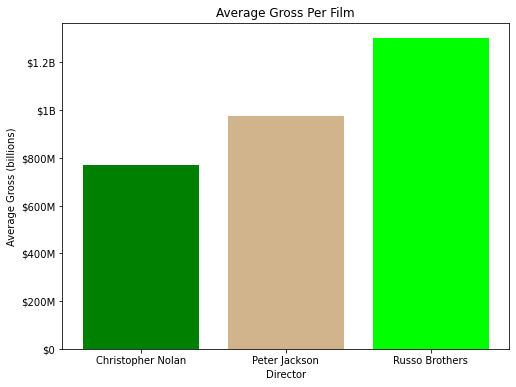

In [58]:
height = [7.715451e+08,9.743160e+08,1.300869e+09]       
x = range(3)
labels = ['Christopher Nolan', 'Peter Jackson', 'Russo Brothers']

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
plt.ticklabel_format(style='plain')

# Plot vertical bars of fixed width by passing x and height values to .bar() function 
ax.bar(x, height, tick_label=labels, color=['green','tan','lime'])

# Give a title to the bar graph and label the axes
ax.set_title("Average Gross Per Film")
ax.set_ylabel("Average Gross (billions)")
ax.set_yticks([0,200000000,400000000,600000000,800000000,1000000000,1200000000])
ax.set_yticklabels(['$0','$200M', '$400M', '$600M', '$800M', '$1B','$1.2B' ])
ax.set_xlabel("Director");

Though the Peter Jackson and Russo Brothers films are higher grossing, they are all respectively in the same genre.  The Jackson films are all Lord of the Rings sequels and the Russo films are all Marvel Superhero films backed by Disney.  These films have the advantage of being sequels to popular franchises, using established source material.  As a new studio Microsoft is unlikely to replicate Peter Jackson or the Russo Brothers' success without Tolkien or Marvel licensing.

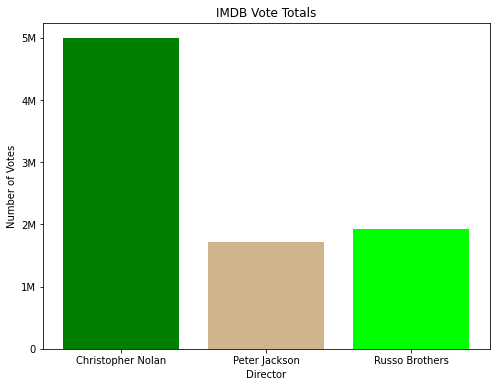

In [59]:
# plot the number of IMDB votes by director
height = [CN['numvotes'].sum(),PJ['numvotes'].sum(),RU['numvotes'].sum()]       
x = range(3)
labels = ['Christopher Nolan', 'Peter Jackson', 'Russo Brothers']

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))


# Plot vertical bars of fixed width by passing x and height values to .bar() function 
ax.bar(x, height, tick_label=labels, color=['green','tan','lime'])

# Give a title to the bar graph and label the axes
ax.set_title("IMDB Vote Totals")
ax.set_ylabel("Number of Votes")
ax.set_yticks([0,1000000,2000000,3000000,4000000,5000000])
ax.set_yticklabels(['0','1M', '2M', '3M', '4M', '5M'])
ax.set_xlabel("Director");

Christopher Nolan is a more ideal director.  Nolan's filmography is more versatile, spanning six genres.  He has seen success both with (Batman films) and without licensed material.  According to IMDB, fans are more engaged with Nolan's films compared to other directors.  The top 3 user voted films of all time, Inception, The Dark Knight Rises, and Interstellar, are all Christopher Nolan films.  He also has the highest average rating for his popular films- averaging an 8.425, compared to Jacksons's 7.7 and the Russo Brothers 8.03.

## Conclusions
  
  I recommend that Microsoft Studios:
  - collaborate with Christopher Nolan 
  - release a big budget film that is heavy on Action & Adventure 
  - aim for a May release 
  
Still, there are some reasons that this recommendation may not fully solve the business problem:

- Release window may be overcrowded by other films.  
- Analysis doesn't make predictions far out into the future.  
- Older films will have less online engagement on IMDB.  
- It would be helpful to additional data: movie streaming numbers, digital purchase and rental sales, VHS and DVD sales, and data during the pandemic and the post-pandemic recovery period.   